In [1]:
'''
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
'''

'\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\n\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n'

# Import Libraries to the project

In [1]:
!pip install tensorflow-addons==0.16.1
!rm -rf ./logs/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.20.0
    Uninstalling tensorflow-addons-0.20.0:
      Successfully uninstalled tensorflow-addons-0.20.0


In [2]:
import tensorflow as tf
### Installing the needed libraries
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")
import datetime
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.metrics import Precision, Recall, AUC
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import plotly.express as px
import shutil

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load data

In [3]:
train_data_path = '/kaggle/input/chest-xray/train'
val_data_path = '/kaggle/input/chest-xray/val'
test_data_path = '/kaggle/input/chest-xray/test'

Count total number of images count in training, validation adn testing  dataset

In [4]:
train_val_data_path = '/kaggle/working/train_val_data'
os.makedirs(train_val_data_path, exist_ok=True)


In [5]:
img_height = 128
img_width = 128
epochs = 15

In [6]:
# Merge train data
for root, _, files in os.walk(train_data_path):
    for file in files:
        source_path = os.path.join(root, file)
        destination_path = os.path.join(train_val_data_path, os.path.basename(root), file)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

# Merge validation data
for root, _, files in os.walk(val_data_path):
    for file in files:
        source_path = os.path.join(root, file)
        destination_path = os.path.join(train_val_data_path, os.path.basename(root), file)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

In [7]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    validation_split=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)


train_generator = image_generator.flow_from_directory(train_val_data_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    color_mode='grayscale',
                                                      subset='training',
                                                    class_mode='binary')
validation_generator = image_generator.flow_from_directory(train_val_data_path,
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    subset='validation')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  samplewise_center=True,
                                  samplewise_std_normalization=True)

test_generator = test_datagen.flow_from_directory(test_data_path,
                                                  target_size=(img_height, img_width),
                                                  batch_size=1,
                                                  shuffle=False,
                                                  class_mode='binary',
                                                  color_mode='grayscale')
   

Found 4710 images belonging to 2 classes.
Found 522 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Visualize the data

In [8]:
# Train dataset
train_class_labels = train_generator.class_indices
train_class_counts = train_generator.classes
class_names = list(train_class_labels.keys())
class_count_dict = {class_name: sum(train_class_counts == train_class_labels[class_name]) for class_name in class_names}
# Create a bar plot using Plotly
fig = px.bar(x=class_names, y=list(class_count_dict.values()), color=class_names,
             text=list(class_count_dict.values()), color_discrete_sequence=["orange", "purple"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Class', yaxis_title='Count', title='Number of Images in Each Class in Training dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')

fig.show()


# Validation dataset
val_class_labels = validation_generator.class_indices
val_class_counts = validation_generator.classes
class_names = list(val_class_labels.keys())
class_count_dict = {class_name: sum(val_class_counts == val_class_labels[class_name]) for class_name in class_names}
# Create a bar plot using Plotly
fig = px.bar(x=class_names, y=list(class_count_dict.values()), color=class_names,
             text=list(class_count_dict.values()), color_discrete_sequence=["orange", "purple"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Class', yaxis_title='Count', title='Number of Images in Each Class in Validation dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')

fig.show()

# Test dataset

test_class_labels = test_generator.class_indices
test_class_counts = test_generator.classes
class_names = list(test_class_labels.keys())
class_count_dict = {class_name: sum(test_class_counts == test_class_labels[class_name]) for class_name in class_names}

# Create a bar plot using Plotly
fig = px.bar(x=class_names, y=list(class_count_dict.values()), color=class_names,
             text=list(class_count_dict.values()), color_discrete_sequence=["orange", "purple"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Class', yaxis_title='Count', title='Number of Images in Each Class in testing dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')
fig.show()



total_training_samples = train_generator.n # The n attribute stores the total number of samples
total_val_samples = validation_generator.n
total_test_samples = test_generator.n


classes = ['Training', 'Validation', 'Test']
counts = [total_training_samples, total_val_samples, total_test_samples]

# Create a bar plot using Plotly
fig = px.bar(x=classes, y=counts, color=classes,
             text=counts, color_discrete_sequence=["orange", "purple", "steelblue"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Dataset', yaxis_title='Count', title='Number of Images in Each Dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')

fig.show()


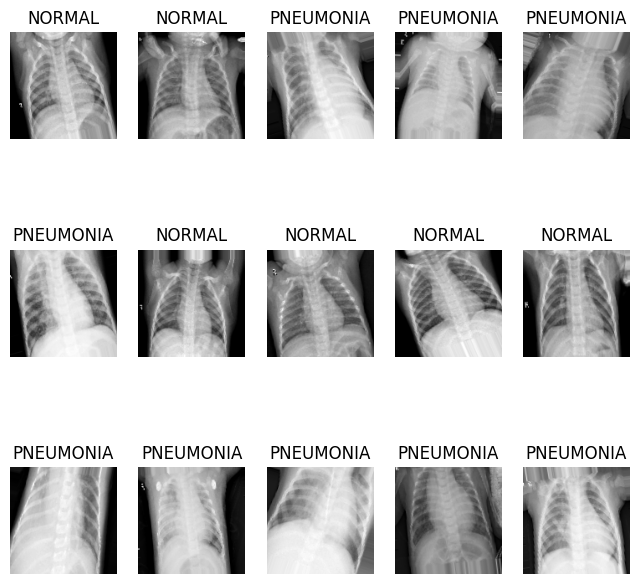

In [9]:
class_names = {0: "NORMAL", 1: "PNEUMONIA"}
num_images = 15

x_batch, y_batch = next(train_generator)
# Plotting the images
plt.figure(figsize=(8, 8))
for i in range(num_images):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_batch[i], cmap='gray')
    label = class_names[int(y_batch[i])]
    plt.title(label)
    plt.axis("off")

plt.show()


Model Architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

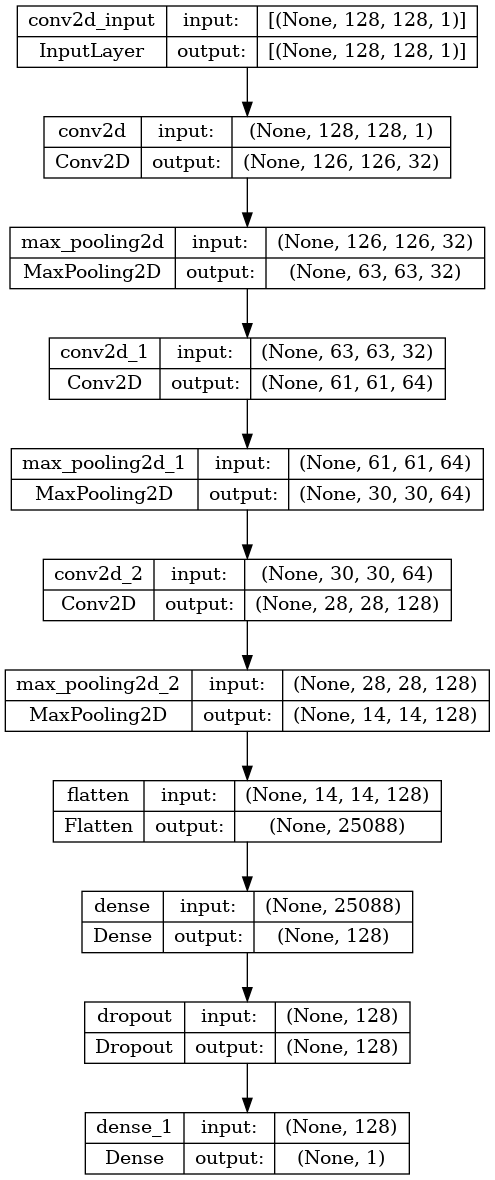

In [10]:
### Building the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
### Show the model summary
model.summary()


plot_model(model, show_shapes=True, show_layer_names=True)

In [11]:
### Loading the TensorBoard notebook extension
%load_ext tensorboard
### creating a TensorBoard callback with a unique log directory based on the current date and time
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [12]:
import keras.backend as K
K.clear_session()

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                     callbacks=[tensorboard_callback])

Epoch 1/15
148/148 [==============================] - 52s 274ms/step - loss: 0.3205 - accuracy: 0.8594 - precision: 0.8869 - recall: 0.9290 - auc: 0.9148 - val_loss: 0.2458 - val_accuracy: 0.8870 - val_precision: 0.8782 - val_recall: 0.9845 - val_auc: 0.9722
Epoch 2/15
148/148 [==============================] - 39s 265ms/step - loss: 0.1690 - accuracy: 0.9406 - precision: 0.9568 - recall: 0.9634 - auc: 0.9761 - val_loss: 0.1697 - val_accuracy: 0.9215 - val_precision: 0.9483 - val_recall: 0.9459 - val_auc: 0.9767
Epoch 3/15
148/148 [==============================] - 39s 262ms/step - loss: 0.1548 - accuracy: 0.9442 - precision: 0.9636 - recall: 0.9611 - auc: 0.9797 - val_loss: 0.1305 - val_accuracy: 0.9425 - val_precision: 0.9661 - val_recall: 0.9562 - val_auc: 0.9870
Epoch 4/15
148/148 [==============================] - 39s 263ms/step - loss: 0.1384 - accuracy: 0.9531 - precision: 0.9680 - recall: 0.9688 - auc: 0.9836 - val_loss: 0.1274 - val_accuracy: 0.9521 - val_precision: 0.9814 - v

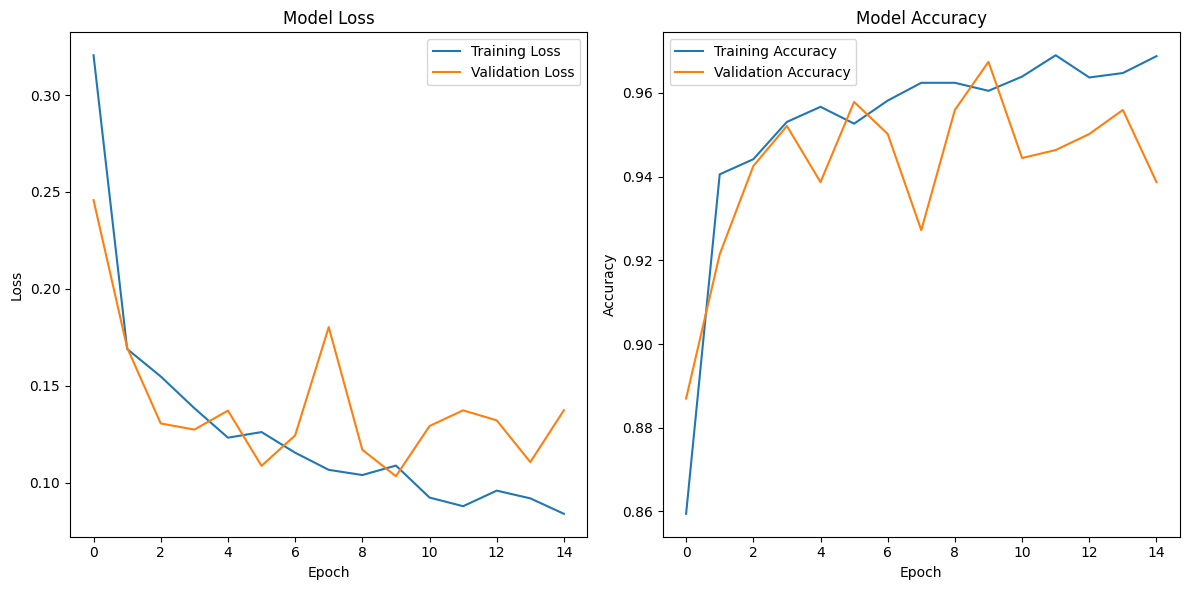

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
num_epochs = range(len(train_loss))

plt.figure(figsize=(12, 6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(num_epochs, train_loss, label='Training Loss')
plt.plot(num_epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(num_epochs, train_acc, label='Training Accuracy')
plt.plot(num_epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
### Evaluating the model on the test set
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_generator, verbose=2)


print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test precision', test_precision)
print('Test recall', test_recall)
print('test AUC',test_auc)


624/624 - 7s - loss: 0.3906 - accuracy: 0.8542 - precision: 0.8257 - recall: 0.9718 - auc: 0.9514 - 7s/epoch - 12ms/step
Test Loss: 0.39056891202926636
Test accuracy: 0.8541666865348816
Test precision 0.8257080316543579
Test recall 0.971794843673706
test AUC 0.9513751864433289
